In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import files

In [ ]:
##files.upload()

In [ ]:
data = pd.read_csv("Customer-Behaviour.csv")

In [ ]:
data

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [ ]:
data.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
395    False
396    False
397    False
398    False
399    False
Length: 400, dtype: bool

In [ ]:
data.duplicated().sum()

0

In [ ]:
data.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [ ]:
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [ ]:
df = data.drop(columns = ["User ID"])

In [ ]:
df

,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0
...,...,...,...,...
395,Female,46,41000,1
396,Male,51,23000,1
397,Female,50,20000,1
398,Male,36,33000,0


<Axes: xlabel='Purchased', ylabel='count'>

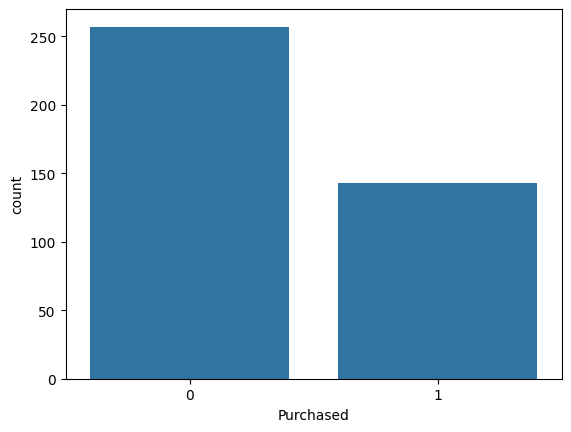

In [ ]:
sns.countplot(x = "Purchased", data = df)

In [ ]:
df["Gender"].unique()

array(['Male', 'Female'], dtype=object)

In [ ]:
lb = LabelEncoder()
df["Gender"] = lb.fit_transform(df["Gender"])

In [ ]:
df

,Gender,Age,EstimatedSalary,Purchased
0,1,19,19000,0
1,1,35,20000,0
2,0,26,43000,0
3,0,27,57000,0
4,1,19,76000,0
...,...,...,...,...
395,0,46,41000,1
396,1,51,23000,1
397,0,50,20000,1
398,1,36,33000,0


<Axes: >

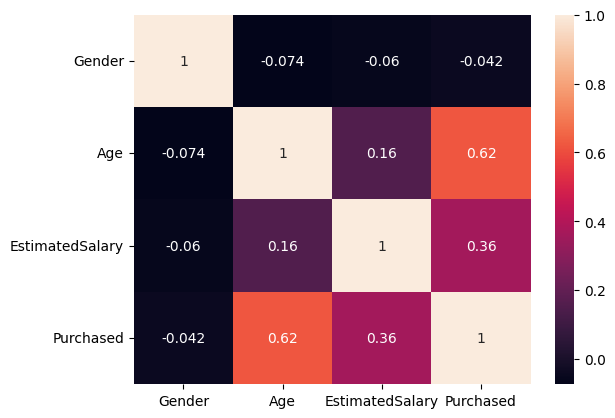

In [ ]:
sns.heatmap(df.corr(), annot = True)

In [ ]:
x = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [ ]:
sc = StandardScaler()
x = sc.fit_transform(x)

In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE()
x, y = smote.fit_resample(x, y)

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test, y_train,y_test = train_test_split(x,y, test_size = 0.15)

In [ ]:
lr_model = LogisticRegression()
lr_model.fit(x_train,y_train)
lr_pred = lr_model.predict(x_test)
print(classification_report(lr_pred,y_test))

              precision    recall  f1-score   support

           0       0.79      0.84      0.81        31
           1       0.89      0.85      0.87        47

    accuracy                           0.85        78
   macro avg       0.84      0.84      0.84        78
weighted avg       0.85      0.85      0.85        78



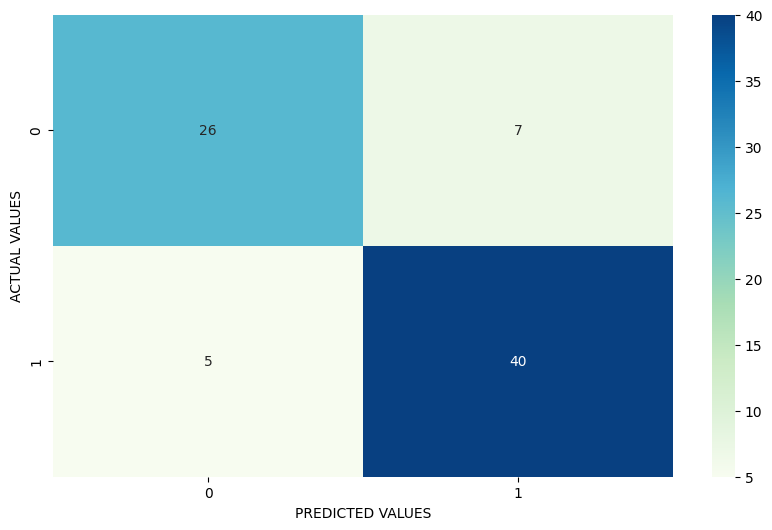

In [ ]:
plt.figure(figsize=(10,6))
fx=sns.heatmap(confusion_matrix(y_test,lr_pred),annot=True,fmt='.0f',cmap='GnBu')
fx.set_xlabel('PREDICTED VALUES')
fx.set_ylabel('ACTUAL VALUES')
plt.show()

## HYPER PARAMETER TUNING

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
parameters = {"C":[0.1, 0.5, 0.6, 0.8], "penalty":["l1", "l2"]}

In [ ]:
gsearch = GridSearchCV(lr_model, parameters, cv = 7)

In [ ]:
gsearch.fit(x_train, y_train)
print(gsearch.best_params_)
bestmodel = gsearch.best_estimator_
pred = bestmodel.predict(x_test)
print (classification_report(y_test, pred))

{'C': 0.5, 'penalty': 'l2'}
              precision    recall  f1-score   support

           0       0.84      0.79      0.81        33
           1       0.85      0.89      0.87        45

    accuracy                           0.85        78
   macro avg       0.84      0.84      0.84        78
weighted avg       0.85      0.85      0.85        78



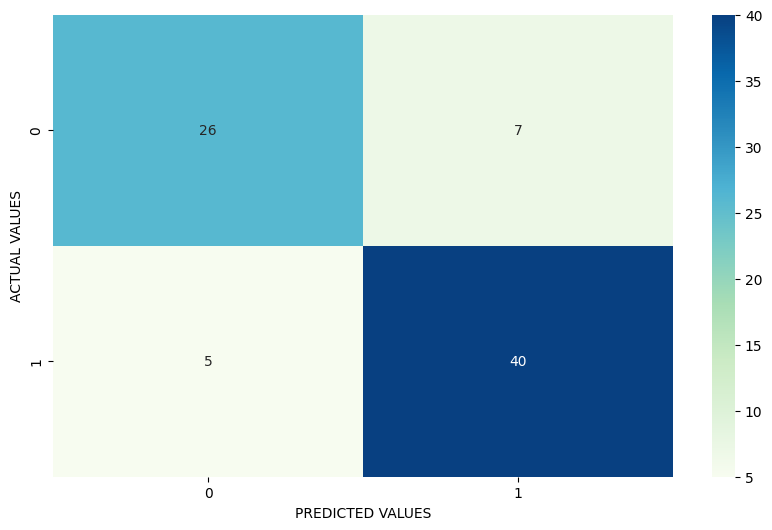

In [ ]:
plt.figure(figsize=(10,6))
fx=sns.heatmap(confusion_matrix(y_test,lr_pred),annot=True,fmt='.0f',cmap='GnBu')
fx.set_xlabel('PREDICTED VALUES')
fx.set_ylabel('ACTUAL VALUES')
plt.show()